<a href="https://www.kaggle.com/code/harsh7996/linear-regression-project-solution?scriptVersionId=298983120" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# ECOMMERCE CUSTOMERS LINEAR REGRESSION ANALYSIS

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [1]:
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [2]:
customers = pd.read_csv('/kaggle/input/ecommerce-customers/Ecommerce Customers')

In [3]:
customers.shape

(500, 8)

In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


**Check the head of customers, and check out its info() and describe() methods.**

In [6]:
customers.head()
#customers.info() and customers.describe()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
 customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

In [9]:
#customers['Yearly Amount Spent'].isnull().sum()  - calculate null values
# np.isinf(customers['Yearly Amount Spent']).sum() - calculate infinite values

Time on Website        0
Yearly Amount Spent    0
dtype: int64
Time on Website        0
Yearly Amount Spent    0
dtype: int64
Time on Website        float64
Yearly Amount Spent    float64
dtype: object


<Figure size 300x300 with 0 Axes>

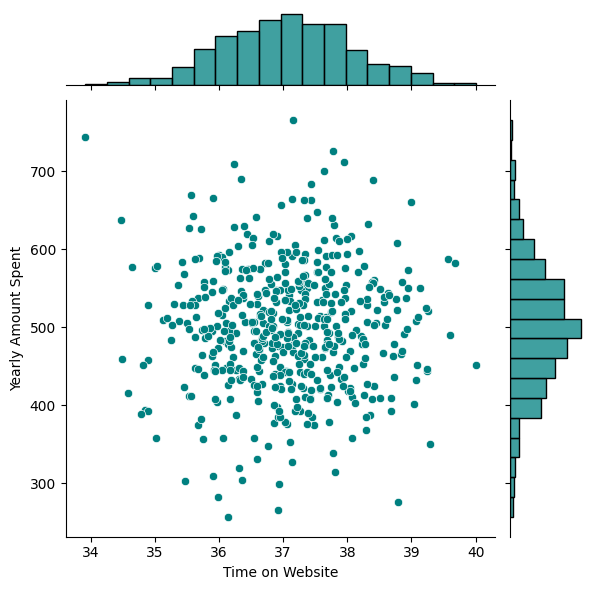

In [10]:
#convert the inf and null to 0
cols = ['Time on Website', 'Yearly Amount Spent']
customers[cols] = customers[cols].replace([np.inf, -np.inf], 0)  # handle inf
customers[cols] = customers[cols].fillna(0)        
print(np.isinf(customers[cols]).sum())   # should be 0
print(customers[cols].isnull().sum())    # should be 0
print(customers[cols].dtypes)

# warning still present then remove using the warnings module
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize = (3,3))
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers ,color = 'teal')
plt.show()


** Do the same but with the Time on App column instead. **

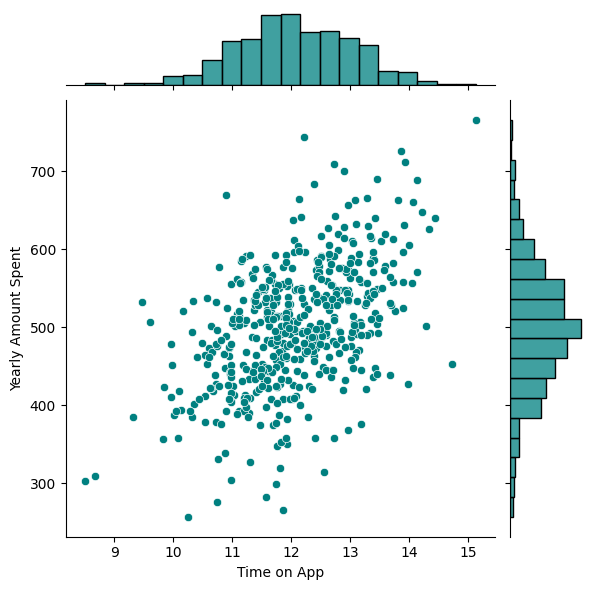

In [11]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers ,color = 'teal')
plt.show()

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

/tmp/ipykernel_17/992104331.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


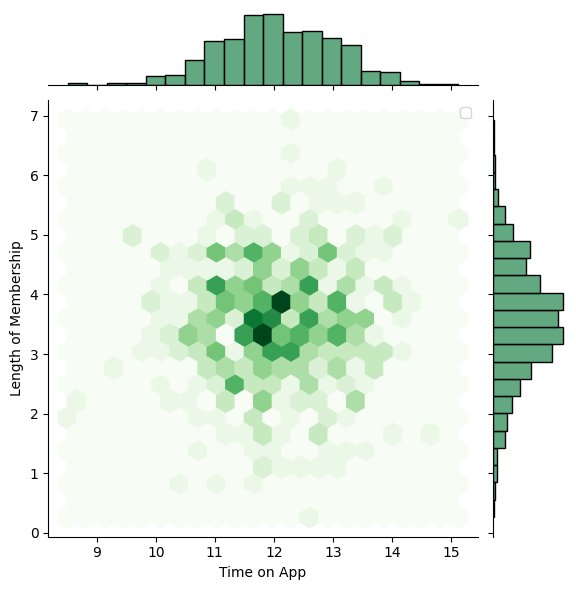

In [12]:
sns.jointplot( kind = 'hex' , x='Time on App', y='Length of Membership', data=customers , color = 'seagreen',cmap='Greens')
plt.legend()
plt.show()

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

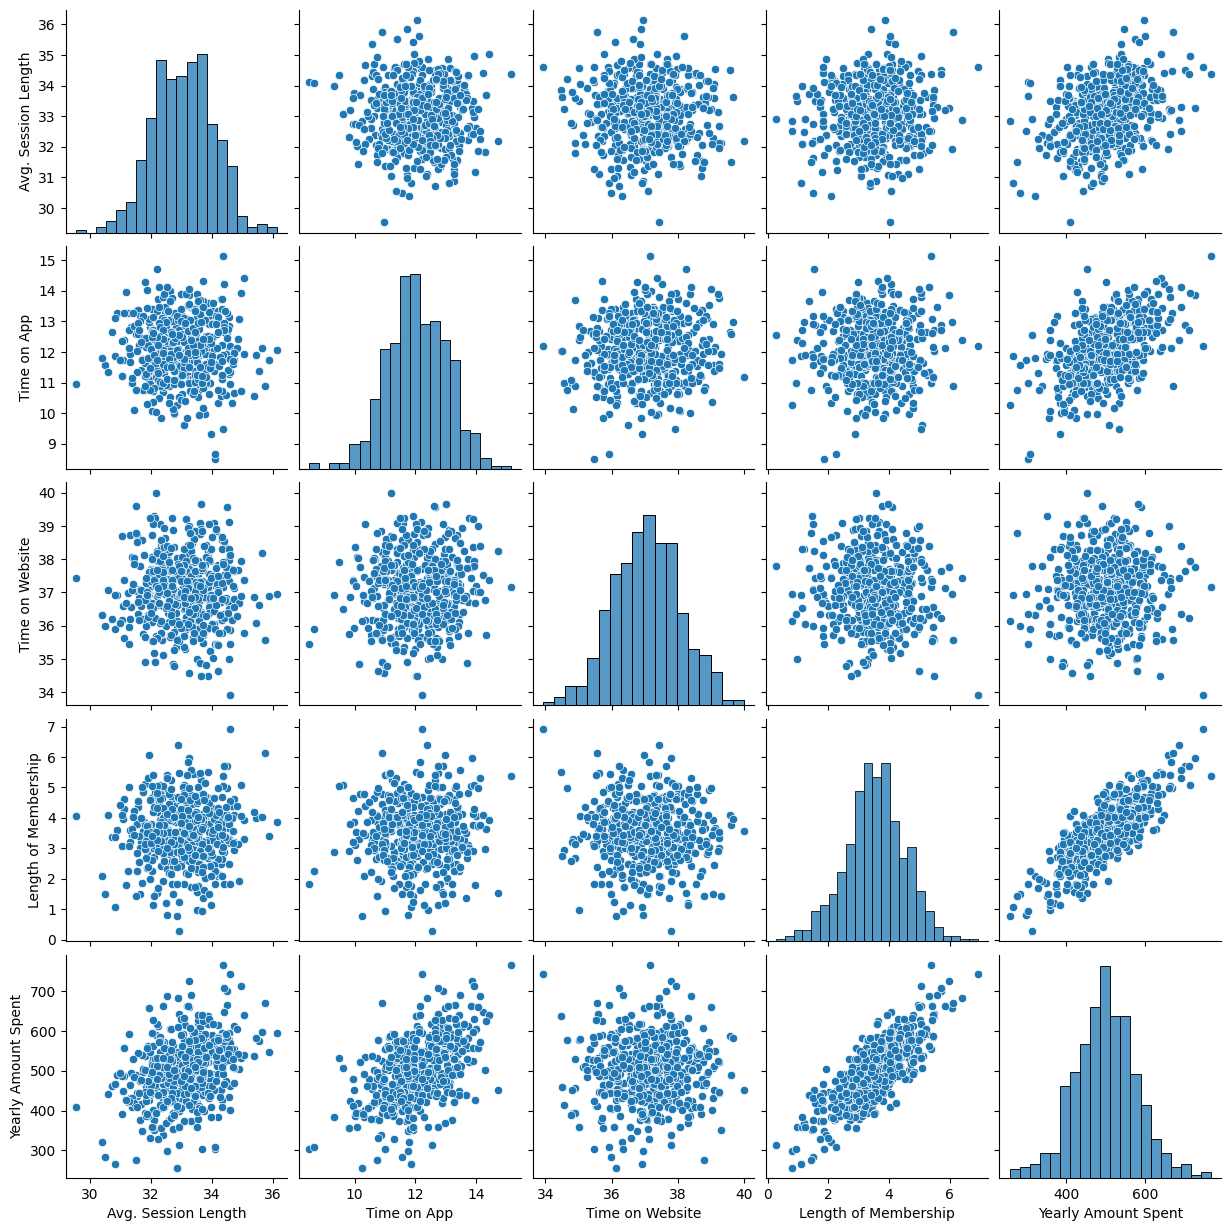

In [13]:
sns.pairplot(customers)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [14]:
customers.select_dtypes(include ='number').corr()
# correlation is stron between Yearly Amount Spent and Lentgh of Membership.

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

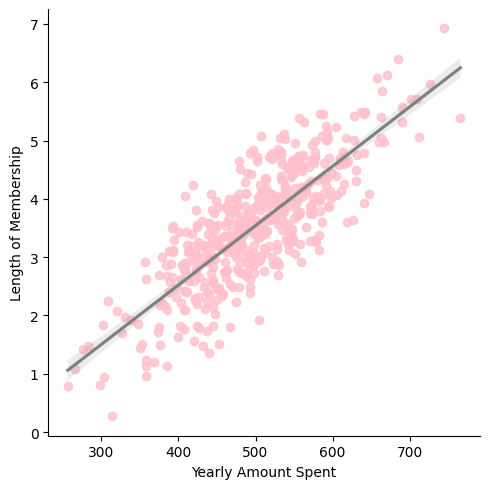

In [15]:
sns.lmplot(x = 'Yearly Amount Spent' , y =  'Length of Membership', data = customers ,    scatter_kws={'color': 'pink'},   # points color
    line_kws={'color': 'grey'}   )    # regression line color)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [16]:
# Get a list of numeric columns
numeric_cols = customers.select_dtypes(include='number').columns
print(numeric_cols)

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')


In [17]:
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website','Length of Membership']]

In [18]:
y = customers['Yearly Amount Spent']

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=101
)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [20]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [21]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [22]:
lm.fit(X_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

In [23]:
print('Intercept:\n', lm.intercept_)

Intercept:
 -1047.9327822502391


In [24]:
print('Coefficients:\n', lm.coef_)

Coefficients:
 [25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [25]:
predictions = lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

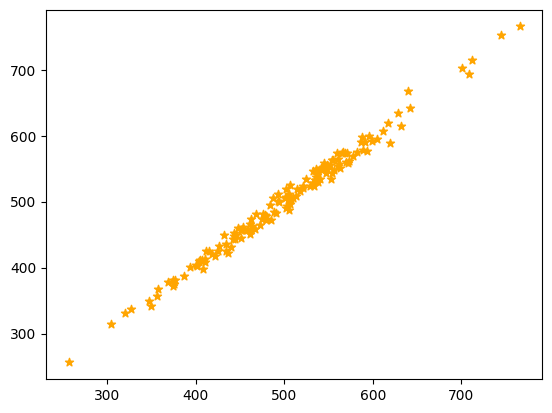

In [26]:
plt.scatter(y_test ,predictions ,alpha = 1, linewidths = 1, color = 'orange' ,marker = '*')

<Axes: xlabel='Yearly Amount Spent'>

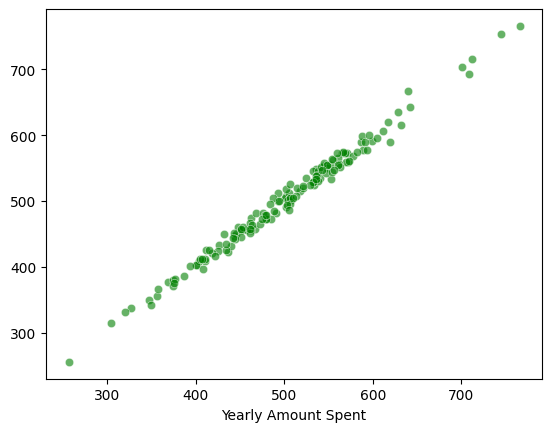

In [27]:

sns.scatterplot(x=y_test, y=predictions, color='green', alpha=0.6)

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [28]:
residuals = y_test - predictions
RSS = np.sum(residuals**2)
print("Residual Sum of Squares (RSS):", RSS)

Residual Sum of Squares (RSS): 11971.95774764614


In [29]:
from sklearn.metrics import r2_score
import numpy as np
R2 = r2_score(y_test, predictions)
print("R^2 (Explained Variance Score):", R2)

R^2 (Explained Variance Score): 0.9890046246741234


In [30]:
from sklearn import metrics

In [31]:
MAE  = metrics.mean_absolute_error(predictions, y_test)
MSE = metrics.mean_squared_error(predictions, y_test)
RMSE = np.sqrt(metrics.mean_squared_error(predictions, y_test))

#print( 'MAE:' , MAE , '\nMSE:' , MSE , '\nRMSE:' , RMSE )
#or 
print(f"""'MAE': {MAE}  
'MSE:': {MSE}  
'RMSE:': {RMSE} """)

'MAE': 7.228148653430826  
'MSE:': 79.81305165097427  
'RMSE:': 8.933815066978624 


## Residuals

Let's quickly explore the residuals to make sure everything was okay with our data. 


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

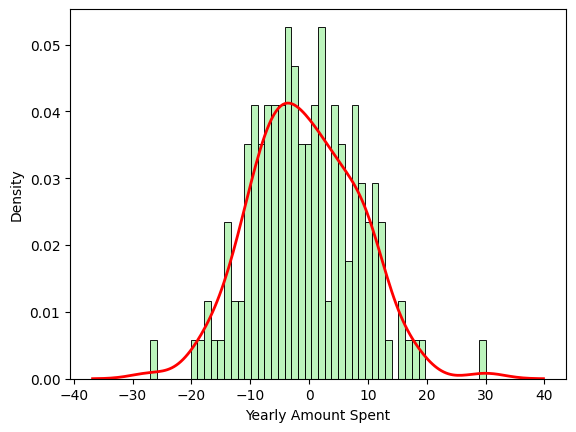

In [32]:
residuals =y_test - predictions
#sns.histplot(residuals, bins=30, kde=True, color="brown", stat="density", alpha=0.6 ) # kde color inisde doesn't work
sns.histplot(residuals, bins=50, color="lightgreen", stat="density", alpha=0.6)

# KDE overlay
sns.kdeplot(residuals, color="red", linewidth=2)

In [33]:
residuals.shape

(150,)

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.


In [34]:
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [35]:
cdf = pd.DataFrame( lm.coef_ , X.columns , columns = ['Coefficient'])

In [36]:
cdf

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Mobie App given the impact it drives towards sales is higher than the website , hence the ROI will be higher.